**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**Introduction:**

Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to
revolutionize daily commutes by offering unique, sustainable transportation solutions.

However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting
company to delve into the factors influencing the demand for their shared electric cycles,
specifically in the Indian market.

**Column Profiling:**

● datetime: datetime

● season: season (1: spring, 2: summer, 3: fall, 4: winter)

● holiday : whether day is a holiday or not

● workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

● weather:

o 1: Clear, Few clouds, partly cloudy

o 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

o 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds

o 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

● temp: temperature in Celsius

● atemp: feeling temperature in Celsius

● humidity: humidity

● windspeed: wind speed

● casual: count of casual users

● registered: count of registered users

● count: count of total rental bikes including both casual and registered

##Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis

###Problem Statement and EDA
1. Which variables are significant in predicting the demand for shared electric cycles in the
Indian market?

2. How well those variables describe the electric cycle demands.

In [410]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc

In [411]:
data = pd.read_csv("yulu_dataset.csv")

In [412]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [413]:
data.shape

(10886, 12)

In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [415]:
data.isna().sum(axis = 0)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [416]:
'''
Observations:
1. There are 10886 rows and 12 columns present in the dataset.
2. The data type for all the variables except datetime is int/float.
3. The data type has to be changed for the following variables:
    1. datetime to datetime
    2. season to categorical
    3. holiday to categorical
    4. workingday to categorical
    5. weather to categorical
4. There are no missing values in the dataset.
'''

'\nObservations:\n1. There are 10886 rows and 12 columns present in the dataset.\n2. The data type for all the variables except datetime is int/float.\n3. The data type has to be changed for the following variables:\n    1. datetime to datetime\n    2. season to categorical\n    3. holiday to categorical\n    4. workingday to categorical\n    5. weather to categorical\n4. There are no missing values in the dataset.\n'

In [417]:
data.describe(include = 'all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,01-01-2011 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [418]:
categorical_variables = ['season', 'holiday', 'workingday', 'weather']
for var in categorical_variables:
  data[var] = data[var].astype('object')

In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  object 
 3   workingday  10886 non-null  object 
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1020.7+ KB


In [420]:
'''
Observations:
1. We have converted the below features from continuous to categorical:
  1. season
  2. holiday
  3. workingday
  4. weather

2. Using the statistical analysis, we can see that the mean and median are very far away for the variables 'casual' and 'registered'.
Also, the standard deviation is very high. This suggests that there are outliers present in the data for these attributes.
'''

"\nObservations:\n1. We have converted the below features from continuous to categorical:\n  1. season\n  2. holiday\n  3. workingday\n  4. weather\n\n2. Using the statistical analysis, we can see that the mean and median are very far away for the variables 'casual' and 'registered'.\nAlso, the standard deviation is very high. This suggests that there are outliers present in the data for these attributes.\n"

In [421]:
#Creating a new column of data type datetime
data['datetime'] = pd.to_datetime(data['datetime'])

In [422]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [423]:
data['hour'] = data['datetime'].dt.hour

In [424]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


<BarContainer object of 24 artists>

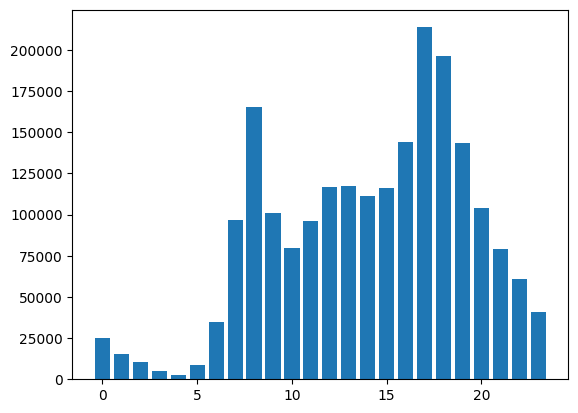

In [425]:
hour_wise_count = data.groupby('hour').agg({'count':'sum'})
plt.bar(data = hour_wise_count, x = hour_wise_count.index.values, height = 'count')

In [426]:
'''
Observations:

1. Thus, we can see that the demand for rented bikes is more between the timings 6 AM - 10 PM.
2. These are the peak hours when the demand is significantly higher than the other hours.

'''

'\nObservations:\n\n1. Thus, we can see that the demand for rented bikes is more between the timings 6 AM - 10 PM.\n2. These are the peak hours when the demand is significantly higher than the other hours.\n\n'

In [427]:
data.duplicated().sum()

0

In [428]:
'''
There are no duplicated entries in the dataset.
'''

'\nThere are no duplicated entries in the dataset.\n'

###Univariate Analysis

In [429]:
min_datetime = data['datetime'].min()
max_datetime = data['datetime'].max()

print('Min datetime present: ', min_datetime)
print('Max datetime present: ', max_datetime)

Min datetime present:  2011-01-01 00:00:00
Max datetime present:  2012-12-19 23:00:00


In [430]:
for column in data.columns.values:
  if data[column].dtype == 'object' and column != 'datetime':
    print('\n No of data-points for each of the unique values of :', column)
    print(data[column].value_counts())


 No of data-points for each of the unique values of : season
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

 No of data-points for each of the unique values of : holiday
0    10575
1      311
Name: holiday, dtype: int64

 No of data-points for each of the unique values of : workingday
1    7412
0    3474
Name: workingday, dtype: int64

 No of data-points for each of the unique values of : weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


<ipython-input-431-49357aacbff5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = column, palette = 'pink')
<ipython-input-431-49357aacbff5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = column, palette = 'pink')
<ipython-input-431-49357aacbff5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = column, palette = 'pink')
<ipython-input-431-49357aacbff5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

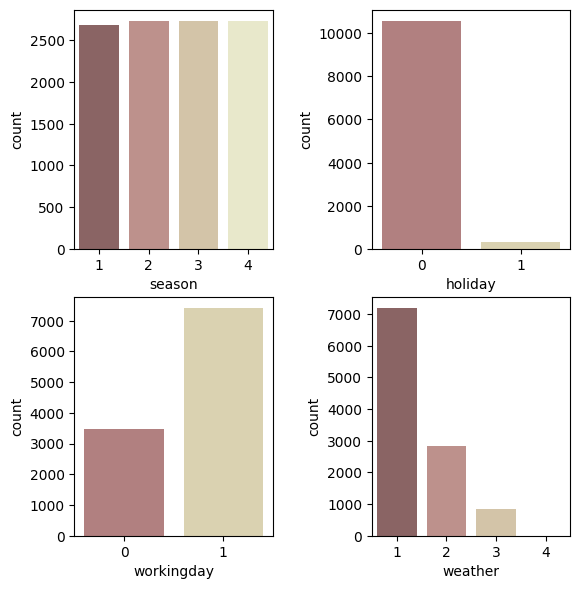

In [431]:
i = 1
for column in data.columns.values:
  if data[column].dtype == 'object' and column != 'datetime':
    #plt.subplot.title('\n Boxplot for analysis of :', column)
    plt.subplot(5, 2, i)
    sns.countplot(data = data, x = column, palette = 'pink')
    i += 1

plt.subplots_adjust(top = 3.0, wspace = 0.5)
plt.show()

In [432]:
'''
Observations:
1. Almost equal data-points are present for each of the values of season.
2. We have majority data-points for holiday = 0 which means people mostly use yulu on non-holiday days.
3. We have more data-points for workingday = 1
4. Maximum data-points are having weather = 1 which is Clear, Few clouds, partly cloudy and literally no row for weather = 4
which means nobody prefers to take yulu when there's Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog.
'''

"\nObservations:\n1. Almost equal data-points are present for each of the values of season.\n2. We have majority data-points for holiday = 0 which means people mostly use yulu on non-holiday days.\n3. We have more data-points for workingday = 1\n4. Maximum data-points are having weather = 1 which is Clear, Few clouds, partly cloudy and literally no row for weather = 4\nwhich means nobody prefers to take yulu when there's Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog.\n"

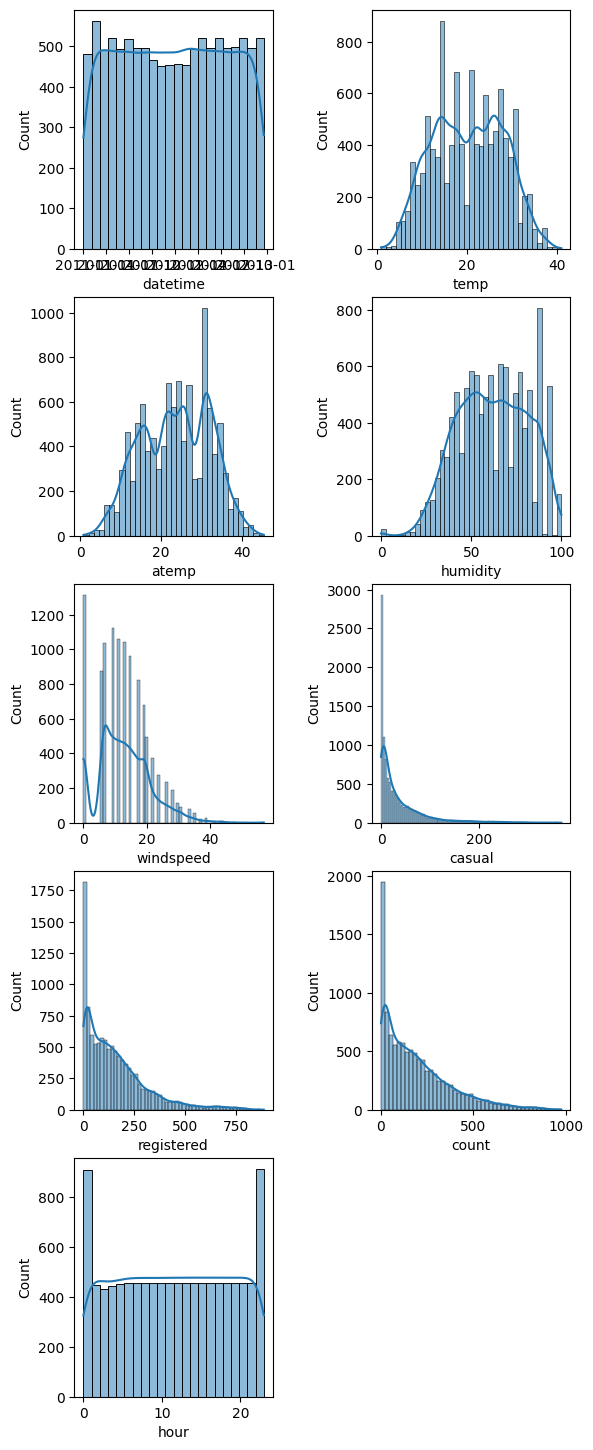

In [433]:
i = 1
for column in data.columns.values:
  if data[column].dtype != 'object':
    #print('\n Boxplot for analysis of :', column)
    plt.subplot(5, 2, i)
    sns.histplot(data = data, x = column, kde = True)
    i += 1

plt.subplots_adjust(top = 3.0, wspace = 0.5)
plt.show()

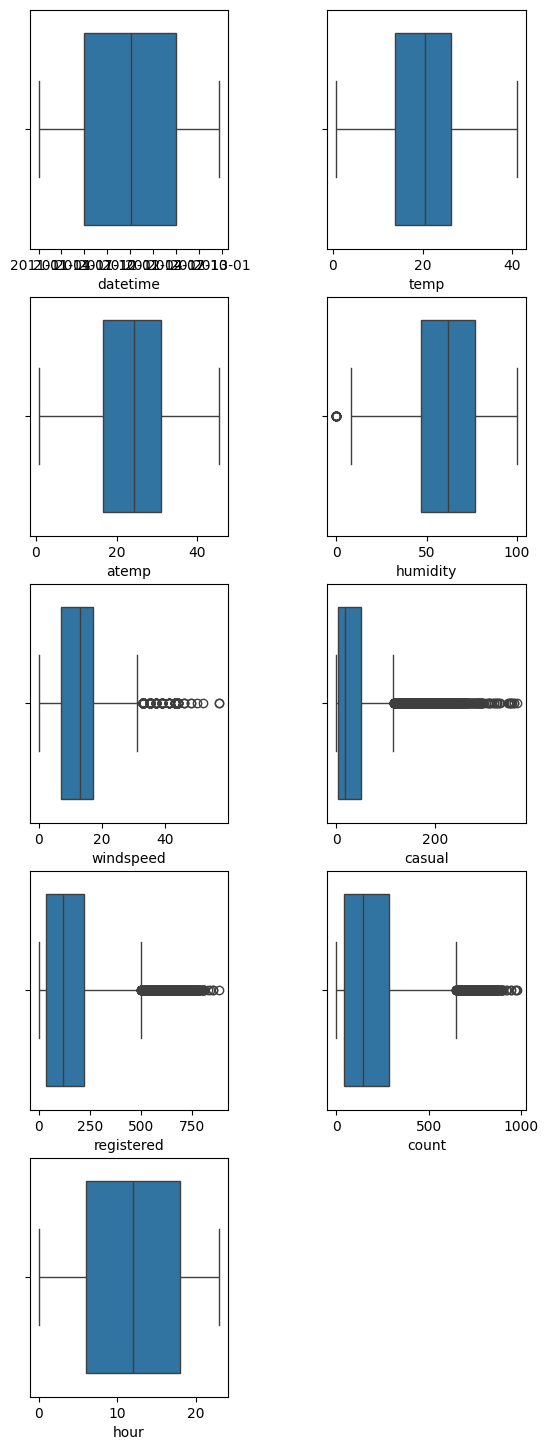

In [434]:
i = 1
for column in data.columns.values:
  if data[column].dtype != 'object':
    #print('\n Boxplot for analysis of :', column)
    plt.subplot(5, 2, i)
    sns.boxplot(data = data, x = column, orient = 'h')
    i += 1

plt.subplots_adjust(top = 3.0, wspace = 0.5)
plt.show()

In [435]:
'''
Observations:
1. Using the box-plot, we can infer that there are outliers present in the variables: windspeed, casual, registered and count.
2. Using the histplots, we can see that the data distributions for variables: casual, registered and count look somewhat like log-normal distribution.
Whereas for temp, atemp and humidity, looks like normal distribution.
'''

'\nObservations:\n1. Using the box-plot, we can infer that there are outliers present in the variables: windspeed, casual, registered and count.\n2. Using the histplots, we can see that the data distributions for variables: casual, registered and count look somewhat like log-normal distribution.\nWhereas for temp, atemp and humidity, looks like normal distribution.\n'

##Relationship between the Dependent and Independent Variables

###Bivariate Analysis

<ipython-input-436-b8f46b61398f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=cat_cols[index], y='count', ax=axis[row, col], palette='pink')
<ipython-input-436-b8f46b61398f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=cat_cols[index], y='count', ax=axis[row, col], palette='pink')
<ipython-input-436-b8f46b61398f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=cat_cols[index], y='count', ax=axis[row, col], palette='pink')
<ipython-input-436-b8f46b61398f>:9: FutureWarning: 

Passing `palette` wi

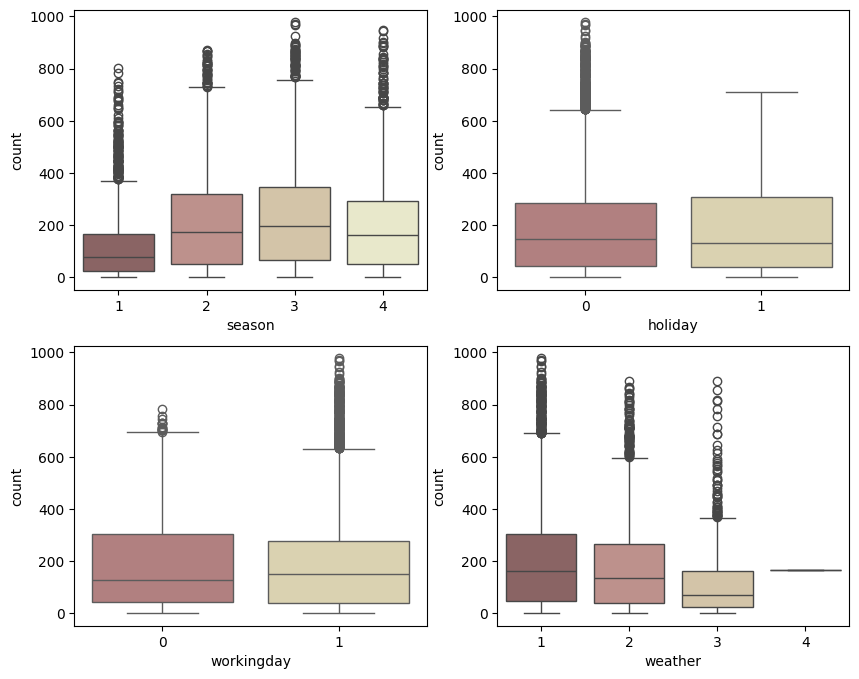

In [436]:
# plotting categorical variables againt count using boxplots

cat_cols= ['season', 'holiday', 'workingday', 'weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=data, x=cat_cols[index], y='count', ax=axis[row, col], palette='pink')
        index += 1

plt.show()

In [437]:
'''
Observations:
Using the above box-plots we can infer that:
1. The number of bikes rented is higher for summer and fall seasons.
2. The number of bikes rented is higher for non-holiday days.
3. The number of bikes rented is higher for working days.
4. The number of bikes rented is higher when weather conditions are: Clear, Few clouds, partly cloudy.
The number of bikes rented is very less when there's Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog.
'''

"\nObservations:\nUsing the above box-plots we can infer that:\n1. The number of bikes rented is higher for summer and fall seasons.\n2. The number of bikes rented is higher for non-holiday days.\n3. The number of bikes rented is higher for working days.\n4. The number of bikes rented is higher when weather conditions are: Clear, Few clouds, partly cloudy.\nThe number of bikes rented is very less when there's Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog.\n"

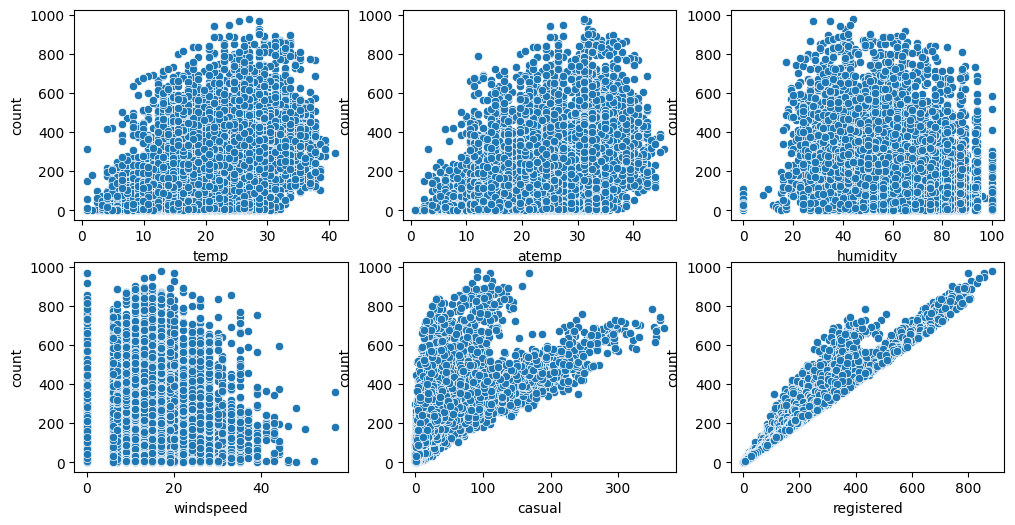

In [438]:
# plotting numerical variables againt count using scatterplot

num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=data, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

In [439]:
'''
Observations:
Using the above scatter-plots, we can infer that:
1. Whenever the humidity is less than 20, number of bikes rented is very very low.
2. Whenever the temperature is less than 10, number of bikes rented is less.
3. Whenever the windspeed is greater than 40, number of bikes rented is very less.
'''

'\nObservations:\nUsing the above scatter-plots, we can infer that:\n1. Whenever the humidity is less than 20, number of bikes rented is very very low. \n2. Whenever the temperature is less than 10, number of bikes rented is less. \n3. Whenever the windspeed is greater than 40, number of bikes rented is very less. \n'

<ipython-input-440-1e1bdccfb7e9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_table = data.corr()


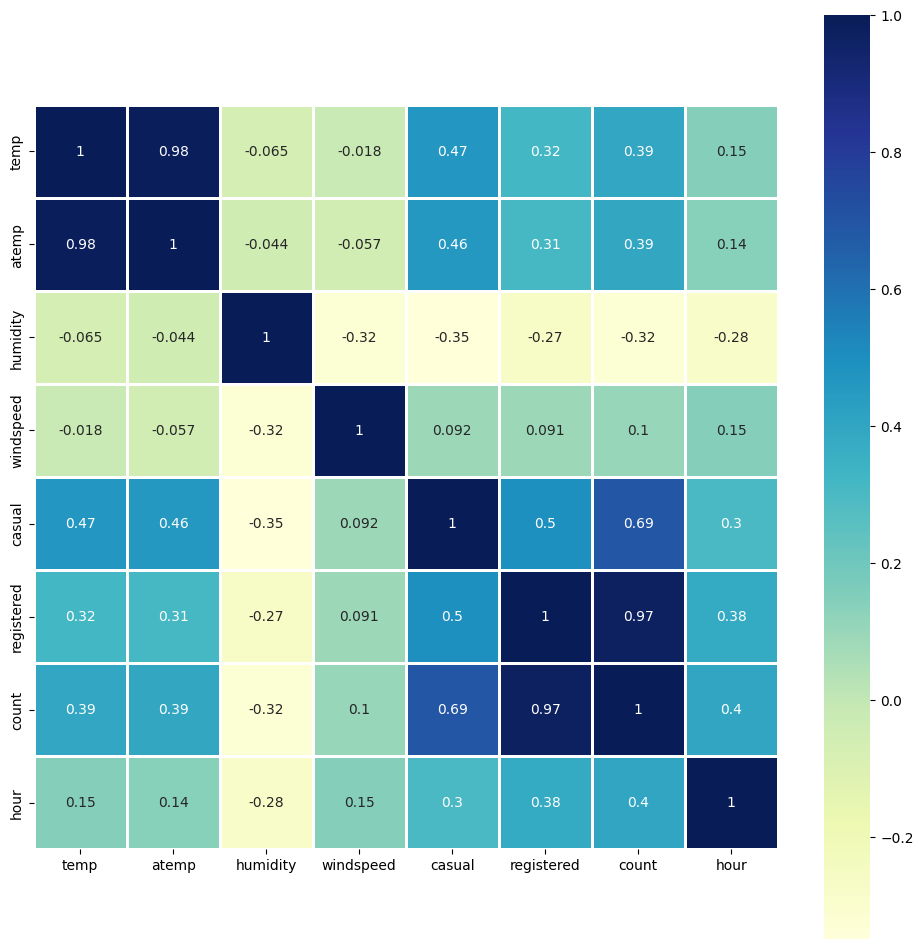

In [440]:
# understanding the correlation between count and numerical variables

plt.figure(figsize = (12, 12))
#data_new = data.drop(['dayofweek', 'is_weekend'], axis = 1)
correlation_table = data.corr()
sns.heatmap(correlation_table, annot = True, linewidths = 2, square = True, cmap = 'YlGnBu')
plt.show()

In [441]:
'''
Observations:
1. We can see that there's a high positive correlation between count and registered variables which means that registered users account more towards the count than the casual users.
2. We can see that there's a significant negative correlation between count of users and humidity
which suggests that as the humidity increases the count of users taking the yulu decreases and vice-a-versa.
3. There's a high positive correlation between temp and atemp variables which means that as the actual temperature increases/decreases, the feeling temperature also increase/decreases.
'''

"\nObservations:\n1. We can see that there's a high positive correlation between count and registered variables which means that registered users account more towards the count than the casual users.\n2. We can see that there's a significant negative correlation between count of users and humidity \nwhich suggests that as the humidity increases the count of users taking the yulu decreases and vice-a-versa.\n3. There's a high positive correlation between temp and atemp variables which means that as the actual temperature increases/decreases, the feeling temperature also increase/decreases.\n"

####Categorical Variables vs Number of Total users

In [442]:
#holiday vs sum(count)
grouped_data = data.groupby(['holiday']).agg({'count': 'sum'})
grouped_data

,count
holiday,
0,2027668
1,57808


<Axes: xlabel='holiday'>

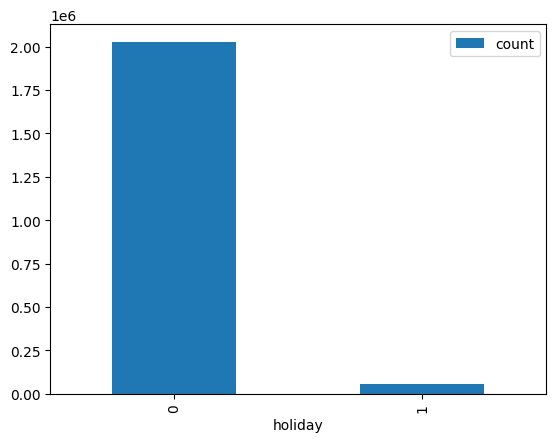

In [443]:
#analysing using bar plot
grouped_data.plot(kind = 'bar')

In [444]:
#analysing using pie plot

bikes = []
for val in grouped_data.values:
  #print(int(val))
  bikes.append(int(val))

bikes

[2027668, 57808]

In [445]:
holiday_values = list(grouped_data.index.values)
holiday_values

[0, 1]

97.22806811332703
2.771933190524578


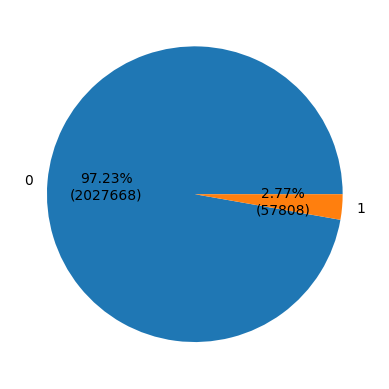

In [446]:
def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

total = np.sum(bikes)
plt.pie(bikes, labels = holiday_values, autopct = my_fmt)
plt.show()

In [447]:
data[(data['holiday'] == 1)]['count'].sum()

57808

In [448]:
#season vs sum(count)
data.groupby('season')['count'].sum()

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

In [449]:
#weather vs sum(count)
data.groupby('weather')['count'].sum()

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

In [450]:
#workingday vs sum(count)
data.groupby('workingday')['count'].sum()

workingday
0     654872
1    1430604
Name: count, dtype: int64

In [451]:
#percentage of casual and registered users

total_count = data['count'].sum()
casual_count = data['casual'].sum()
registered_count = data['registered'].sum()


print('Percentage of casual users: ', casual_count*100/total_count)
print('Percentage of registered users: ', registered_count*100/total_count)

Percentage of casual users:  18.8031413451893
Percentage of registered users:  81.1968586548107


In [452]:
'''
Observations:
1. The number of total rental bikes is greater for fall season followed by summer, winter and spring.
2. The number of total rental bikes is greater on working days than non-working days.
3. The number of total rental bikes is greater for the weather - Clear, Few clouds, partly cloudy as compared to other weather conditions.
4. The percentage of casual users is way lesser than the percentage of registered users.
'''

'\nObservations:\n1. The number of total rental bikes is greater for fall season followed by summer, winter and spring.\n2. The number of total rental bikes is greater on working days than non-working days.\n3. The number of total rental bikes is greater for the weather - Clear, Few clouds, partly cloudy as compared to other weather conditions.\n4. The percentage of casual users is way lesser than the percentage of registered users.\n'

##Outlier Detection and Treatment

###Outlier Detection

In [453]:
#Calculating few more statistical measures such as 'Range', 'IQR', 'Lower Whisker' and 'Upper Whisker'
descriptive_stats = data.describe()
descriptive_stats = descriptive_stats.reindex(descriptive_stats.index.values.tolist()+['Range', 'IQR', 'Lower Whisker', 'Upper Whisker'])

for col in descriptive_stats.columns:
  if data[col].dtype != 'object':
    descriptive_stats.loc['Range'][col] = descriptive_stats.loc['max'][col] - descriptive_stats.loc['min'][col]
    descriptive_stats.loc['IQR'][col] = descriptive_stats.loc['75%'][col] - descriptive_stats.loc['25%'][col]
    descriptive_stats.loc['Lower Whisker'][col] = descriptive_stats.loc['25%'][col] - (1.5 * descriptive_stats.loc['IQR'][col])
    descriptive_stats.loc['Upper Whisker'][col] = descriptive_stats.loc['75%'][col] + (1.5 * descriptive_stats.loc['IQR'][col])

descriptive_stats

,temp,atemp,humidity,windspeed,casual,registered,count,hour
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000
Range,40.18000,44.695000,100.000000,56.996900,367.000000,886.000000,976.000000,23.000000
IQR,12.30000,14.395000,30.000000,9.996400,45.000000,186.000000,242.000000,12.000000


In [454]:
#counting the number of outliers present in each variable using IQR method
for col in descriptive_stats.columns:
  print(col, ':', data[(data[col] < descriptive_stats.loc['Lower Whisker'][col]) | (data[col] > descriptive_stats.loc['Upper Whisker'][col])][col].count())

temp : 0
atemp : 0
humidity : 22
windspeed : 227
casual : 749
registered : 423
count : 300
hour : 0


In [455]:
#calculating the percentage of outliers present in each variable
for col in descriptive_stats.columns:
  print(col, ':', data[(data[col] < descriptive_stats.loc['Lower Whisker'][col]) | (data[col] > descriptive_stats.loc['Upper Whisker'][col])][col].count()*100/len(data))

temp : 0.0
atemp : 0.0
humidity : 0.20209443321697593
windspeed : 2.085247106375161
casual : 6.880396839977953
registered : 3.885724784126401
count : 2.75583318023149
hour : 0.0


In [456]:
'''
Observations:

1. There are significant number of outliers present in windspeed, casual, registered and count variables.
2. Also, humidity has a few outliers.
'''

'\nObservations:\n\n1. There are significant number of outliers present in windspeed, casual, registered and count variables.\n2. Also, humidity has a few outliers.\n'

###Outlier Treatment

In [457]:
#Clip the outliers using minimum and maximum i.e. if value < minimum then update value to minimum and similarly is value > maximum then update value to maximum.

In [458]:
for col in descriptive_stats.columns:
  data.loc[data[col] < descriptive_stats.loc['Lower Whisker'][col], col] = descriptive_stats.loc['Lower Whisker'][col]
  data.loc[data[col] > descriptive_stats.loc['Upper Whisker'][col], col] = descriptive_stats.loc['Upper Whisker'][col]

In [459]:
for col in descriptive_stats.columns:
  print(col, ':', data[(data[col] < descriptive_stats.loc['Lower Whisker'][col]) | (data[col] > descriptive_stats.loc['Upper Whisker'][col])][col].count())

temp : 0
atemp : 0
humidity : 0
windspeed : 0
casual : 0
registered : 0
count : 0
hour : 0


##Hypothesis Testing

### Check if there's any significant difference between the no. of bike rides on Weekdays and Weekends?

In [460]:
#Adding a new column 'dayofweek' which will be having value [0-6] for [Mon-Sun]
from datetime import datetime
data['dayofweek'] = data['datetime'].dt.dayofweek

In [461]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13,16,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32,40,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27,32,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10,13,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1,1,4,5


In [462]:
#Adding a new column to identify if the day was on weekday or on weekend
data['is_weekend'] = (data['dayofweek'] > 4)

In [463]:
data.groupby(['is_weekend'])['count'].sum()

is_weekend
False    1451356
True      602885
Name: count, dtype: int64

In [464]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,is_weekend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13,16,0,5,True
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32,40,1,5,True
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27,32,2,5,True
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10,13,3,5,True
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1,1,4,5,True


In [465]:
#Two Sample Independent T-Test
#Since we have to compare the demand for two samples --> weekdays and weekends so we will perform T-Test

from scipy.stats import ttest_ind

#H0 [Null Hypothesis]: demand for bikes is same on weekdays and weekends
#Ha [Alternate Hypothesis]: demand for bikes is different on weekdays and weekends

alpha = 0.05

In [466]:
weekdays = data[data['is_weekend'] == False]['count']
weekends = data[data['is_weekend'] == True]['count']

In [467]:
'''
Before conducting the two-sample T-Test we need to find if the given data groups have
the same variance. If the ratio of the larger data groups to the small data group is less
than 4:1 then we can consider that the given data groups have equal variance.
'''

'\nBefore conducting the two-sample T-Test we need to find if the given data groups have \nthe same variance. If the ratio of the larger data groups to the small data group is less \nthan 4:1 then we can consider that the given data groups have equal variance. \n'

In [468]:
print(np.var(weekdays), np.var(weekends))
print(np.var(weekdays) // np.var(weekends))

29297.3452549416 30763.766315011857
0.0


In [469]:
t_stat, p_val = ttest_ind(weekdays, weekends)
t_stat, p_val

(-0.8983490774297157, 0.36901934792790525)

In [470]:
if p_val < alpha:
  print('Since the p-value {:.2f} is less than or equal to the predetermined level of significance (alpha = 0.05), we have evidence to reject the null hypothesis. Meaning that there is a significant difference between the no. of bike rides on Weekdays and Weekends'.format(p_val))
else:
  print('Since the p-value {:.2f} is greater than the predetermined level of significance (alpha = 0.05), we do not have sufficient evidence to reject the null hypothesis. Meaning that there is no significant difference between the no. of bike rides on Weekdays and Weekends'.format(p_val))


Since the p-value 0.37 is greater than the predetermined level of significance (alpha = 0.05), we do not have sufficient evidence to reject the null hypothesis. Meaning that there is no significant difference between the no. of bike rides on Weekdays and Weekends


In [471]:
'''
Conclusion:
Since p_val > 0.05 so, we fail to reject H0. So, demand is same on weekdays and weekends.
'''

'\nConclusion:\nSince p_val > 0.05 so, we fail to reject H0. So, demand is same on weekdays and weekends.\n'

### Check if the demand of bicycles on rent is the same for different weather conditions?

In [472]:
'''
1. Since, we are supposed to compare 4 different groups so we can use one-way ANOVA

2. But first we will check if the assumptions of one-way ANOVA hold true
If yes, then we will perform one-way ANOVA else we will peform Kruskal Wallis Test.

3. One-way ANOVA compares the means of three or more different groups
whereas Kruskal Wallis compares the medians of three or more different groups when data is normally distributed

4. One-Way ANOVA is a parametric test whereas Kruskal Wallis is non-parametric test.
'''

'\n1. Since, we are supposed to compare 4 different groups so we can use one-way ANOVA\n\n2. But first we will check if the assumptions of one-way ANOVA hold true\nIf yes, then we will perform one-way ANOVA else we will peform Kruskal Wallis Test.\n\n3. One-way ANOVA compares the means of three or more different groups \nwhereas Kruskal Wallis compares the medians of three or more different groups when data is normally distributed\n\n4. One-Way ANOVA is a parametric test whereas Kruskal Wallis is non-parametric test.\n'

In [473]:
data.groupby('weather')['count'].sum()

weather
1    1451617
2     501554
3     100906
4        164
Name: count, dtype: int64

In [474]:
from statsmodels.graphics.gofplots import qqplot

#H0: The demand for the bicycles on rent is same for all 4 weather conditions
#Ha: The demand for the bicycles on rent is different for at least one of the 4 weather conditions

#significance level = alpha

alpha = 0.05

In [475]:
weather_1 = data[data['weather'] == 1]['count']
weather_2 = data[data['weather'] == 2]['count']
weather_3 = data[data['weather'] == 3]['count']
weather_4 = data[data['weather'] == 4]['count']

weather_groups = [weather_1, weather_2, weather_3, weather_4]

In [476]:
'''
Checking the assumptions for ANOVA
1. Normality Test for normal distribution of data of each group
2. Variability Test for equal variances within groups
3. Data is independent
'''

'\nChecking the assumptions for ANOVA\n1. Normality Test for normal distribution of data of each group\n2. Variability Test for equal variances within groups\n3. Data is independent\n'

In [477]:
#Normality Test: Shapiro Wilk Test
from scipy.stats import shapiro

#H0: Data is gaussian
#Ha: Data is not gaussian

In [478]:
test_stat, p_val = shapiro(weather_1)
test_stat, p_val

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8987792730331421, 0.0)

In [479]:
test_stat, p_val = shapiro(weather_2)
test_stat, p_val

(0.8865376710891724, 1.7712412589065688e-41)

In [480]:
test_stat, p_val = shapiro(weather_3)
test_stat, p_val

(0.788669764995575, 6.402264154069943e-32)

In [481]:
weather_4

5631    164
Name: count, dtype: int64

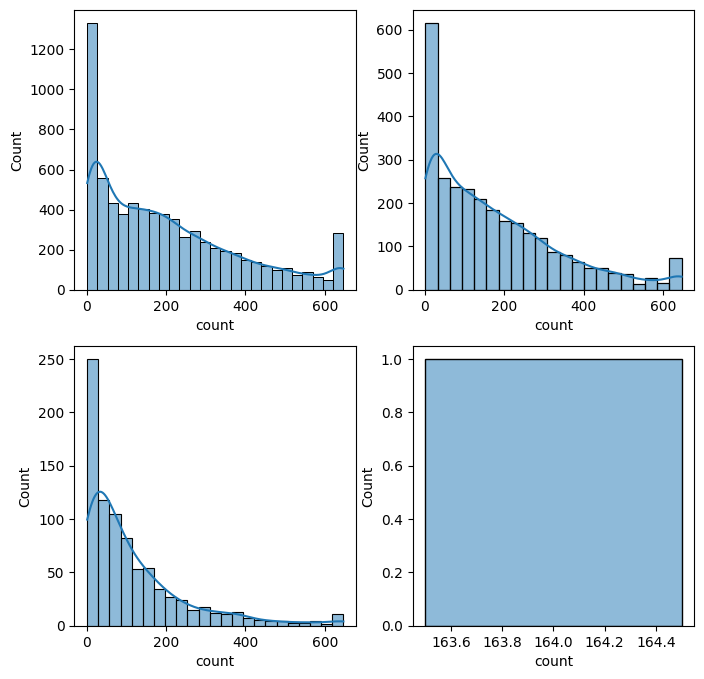

In [482]:
#Plot Histogram for analysing the data distribution for each weather group
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.histplot(weather_groups[index], ax=axis[row, col], kde=True)
        index += 1

plt.show()

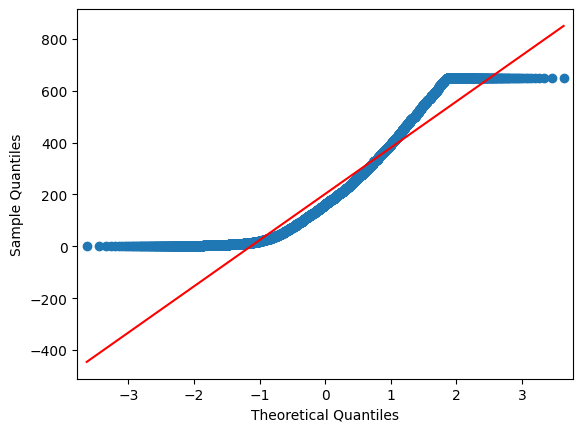

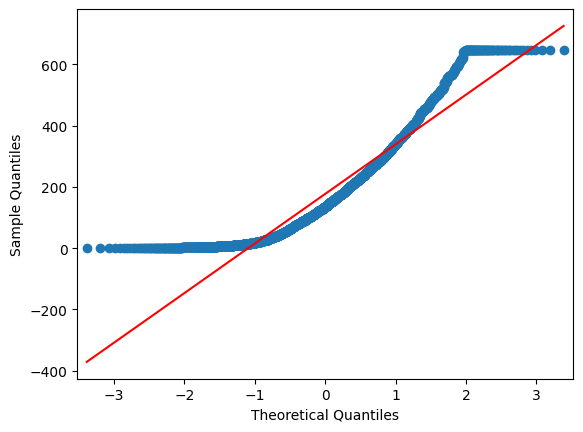

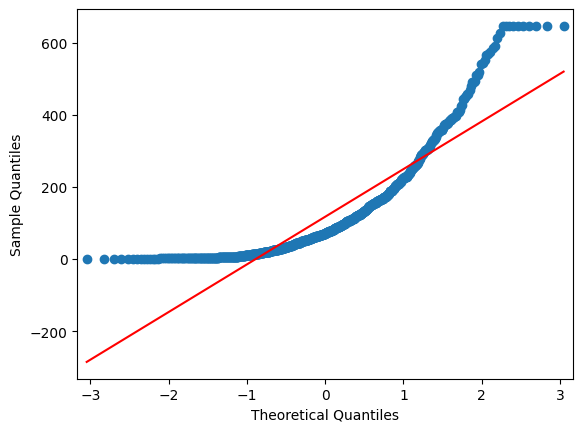

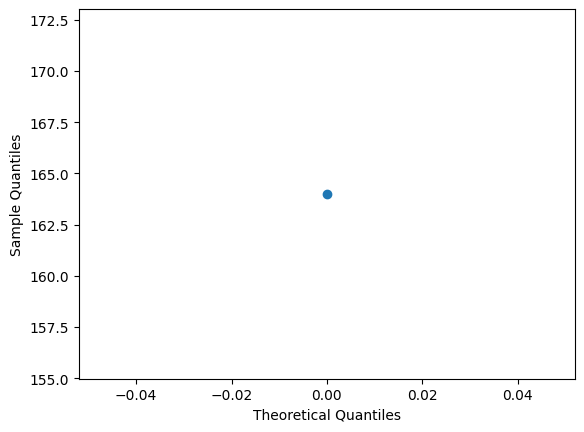

In [483]:
##Plot Q-Q Plot [Quantile Quantile Plot] for analysing the data distribution for each weather group
index = 0
for row in range(2):
    for col in range(2):
        qqplot(weather_groups[index], line="s")
        index += 1

plt.show()

In [484]:
'''
Observations:
1. Using the Shpairo Wilk Test, we can see that the p_val < 0.05 so, the 4 weather groups' data distributions don't follow gaussian (normal) disribution.
2. So, Shapiro's Test for normality has been failed.
3. The results of Shapiro test have been verified using the Q-Q Plot as well.
'''

"\nObservations:\n1. Using the Shpairo Wilk Test, we can see that the p_val < 0.05 so, the 4 weather groups' data distributions don't follow gaussian (normal) disribution.\n2. So, Shapiro's Test for normality has been failed.\n3. The results of Shapiro test have been verified using the Q-Q Plot as well. \n"

In [485]:
#Skewness
skew_1 = weather_1.skew()
skew_2 = weather_2.skew()
skew_3 = weather_3.skew()
skew_4 = weather_4.skew()

skew_1, skew_2, skew_3, skew_4

(0.889718073393374, 1.0865993527456523, 1.866516508736173, nan)

In [486]:
#Kurtosis
kurt_1 = weather_1.kurt()
kurt_2 = weather_2.kurt()
kurt_3 = weather_3.kurt()
kurt_4 = weather_4.kurt()

kurt_1, kurt_2, kurt_3, kurt_4

(-0.07675757291483398, 0.5909595721045058, 3.637210263162605, nan)

In [487]:
#Thus, we can see that the data is positively skewed i.e. right tailed skewness is present.

In [488]:
#Variability Test : Levene's Test
from scipy.stats import levene

#H0: Varinaces are equal within the groups
#Ha: Varinaces are not equal within the groups

In [489]:
test_stat, p_val = levene(weather_1, weather_2, weather_3, weather_4)
test_stat, p_val

(59.78620431801216, 2.499984328437755e-38)

In [490]:
'''
Observations:
1. Since, p_val < 0.05 so we reject null hypothesis which means the variances are not equal within the groups.
2. Thus, Levene's test for equal variances within groups has been failed.
'''

"\nObservations:\n1. Since, p_val < 0.05 so we reject null hypothesis which means the variances are not equal within the groups.\n2. Thus, Levene's test for equal variances within groups has been failed.\n"

In [491]:
'''
Conclusion:
Thus, we cant't perform one-way ANOVA as the assumptions for ANOVA don't hold true.
So, we will perform Kruskal Wallis Test which compares medians of different groups.
'''

"\nConclusion:\nThus, we cant't perform one-way ANOVA as the assumptions for ANOVA don't hold true.\nSo, we will perform Kruskal Wallis Test which compares medians of different groups.\n"

In [492]:
#Kruskal Wallis Test

#H0: The medians of groups are same
#Ha: The medians of groups are not the same

from scipy.stats import kruskal
test_stat, p_val = kruskal(weather_1, weather_2, weather_3, weather_4)
test_stat, p_val

(205.04853208154285, 3.421748763291878e-44)

In [493]:
if p_val < alpha:
  print('Since the p-value {:.2f} is less than or equal to the predetermined level of significance (alpha = 0.05), we have evidence to reject the null hypothesis. Meaning that the demand for bicycles is not the same for different weather conditions.'.format(p_val))
else:
  print('Since the p-value {:.2f} is greater than the predetermined level of significance (alpha = 0.05), we do not have sufficient evidence to reject the null hypothesis. Meaning that the demand for bicycles is the same for different weather conditions.'.format(p_val))


Since the p-value 0.00 is less than or equal to the predetermined level of significance (alpha = 0.05), we have evidence to reject the null hypothesis. Meaning that the demand for bicycles is not the same for different weather conditions.


In [494]:
'''
Observations:
Since, p_val < alpha (0.05) so we can reject the null hypothesis
So, the demand is not the same for all weather conditions
'''

'\nObservations:\nSince, p_val < alpha (0.05) so we can reject the null hypothesis\nSo, the demand is not the same for all weather conditions\n'

### Check if the demand of bicycles on rent is the same for different Seasons?

In [495]:
'''
1. Since, we are supposed to compare 4 different groups so we can use one-way ANOVA

2. But first we will check if the assumptions of one-way ANOVA hold true
If yes, then we will perform one-way ANOVA else we will peform Kruskal Wallis Test.

3. One-way ANOVA compares the means of three or more different groups
whereas Kruskal Wallis compares the medians of three or more different groups when data is normally distributed

4. One-Way ANOVA is a parametric test whereas Kruskal Wallis is non-parametric test.
'''

'\n1. Since, we are supposed to compare 4 different groups so we can use one-way ANOVA\n\n2. But first we will check if the assumptions of one-way ANOVA hold true\nIf yes, then we will perform one-way ANOVA else we will peform Kruskal Wallis Test.\n\n3. One-way ANOVA compares the means of three or more different groups \nwhereas Kruskal Wallis compares the medians of three or more different groups when data is normally distributed\n\n4. One-Way ANOVA is a parametric test whereas Kruskal Wallis is non-parametric test.\n'

In [496]:
data.groupby('season')['count'].sum()

season
1    311515
2    579856
3    626326
4    536544
Name: count, dtype: int64

In [497]:
'''
Checking the assumptions for ANOVA
1. Normality Test for normal distribution of data of each group
2. Variability Test for equal variances within groups
'''

'\nChecking the assumptions for ANOVA\n1. Normality Test for normal distribution of data of each group\n2. Variability Test for equal variances within groups\n'

In [498]:
#Normality Test: Shapiro Wilk Test
from scipy.stats import shapiro

#H0: Data is gaussian
#Ha: Data is not gaussian

In [499]:
season_1 = data[data['season'] == 1]['count']
season_2 = data[data['season'] == 2]['count']
season_3 = data[data['season'] == 3]['count']
season_4 = data[data['season'] == 4]['count']

season_groups = [season_1, season_2, season_3, season_4]

alpha = 0.05

In [500]:
test_stat, p_val = shapiro(season_1)
test_stat, p_val

(0.8147448301315308, 0.0)

In [501]:
test_stat, p_val = shapiro(season_2)
test_stat, p_val

(0.9027974009513855, 1.3308493050696584e-38)

In [502]:
test_stat, p_val = shapiro(season_3)
test_stat, p_val

(0.9245859384536743, 5.281442164890545e-35)

In [503]:
test_stat, p_val = shapiro(season_4)
test_stat, p_val

(0.9057514071464539, 3.6797419444712963e-38)

In [504]:
'''
Since, p_val < 0.05 for each season group so, we can reject null hypothesis which means that the data distribution is not gaussian normal for each group.
Thus, the normality test for data to have normal distribution has been failed.
'''

'\nSince, p_val < 0.05 for each season group so, we can reject null hypothesis which means that the data distribution is not gaussian normal for each group.\nThus, the normality test for data to have normal distribution has been failed.\n'

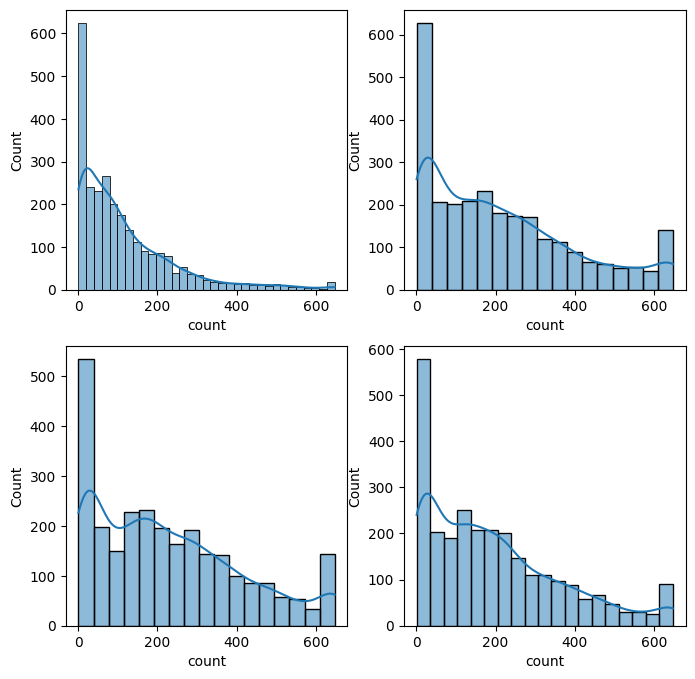

In [505]:
#Plot Histogram for analysing the data distribution for each weather group

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.histplot(season_groups[index], ax=axis[row, col], kde=True)
        index += 1

plt.show()

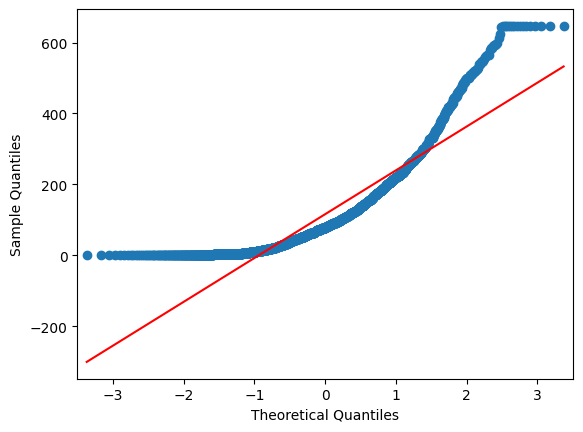

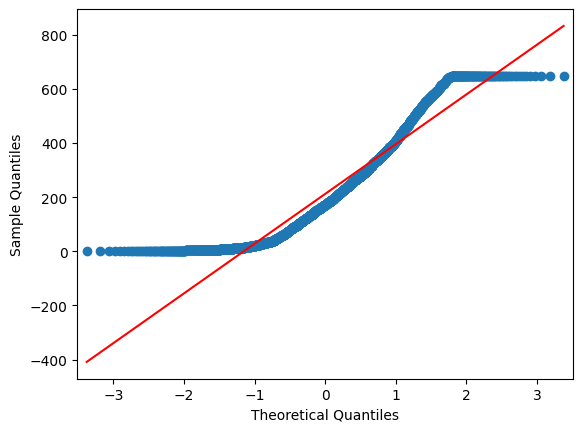

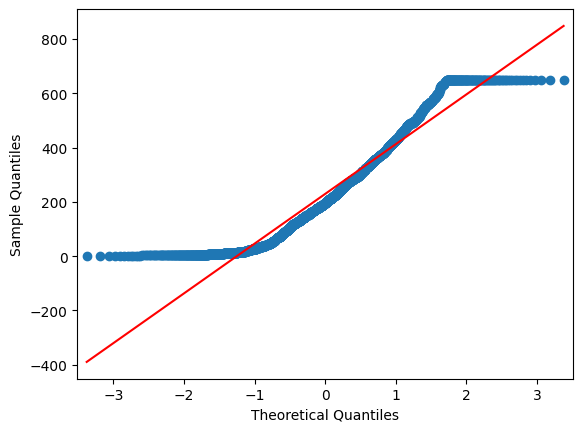

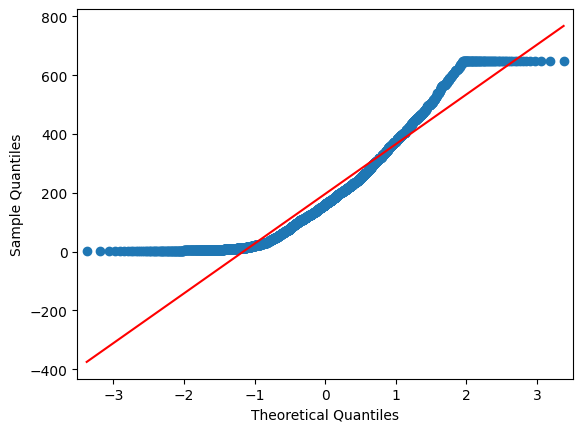

In [506]:
#Plot Q-Q Plot for analysing the data distribution for each weather group

index = 0
for row in range(2):
    for col in range(2):
        qqplot(season_groups[index], line="s")
        index += 1

plt.show()

In [507]:
'''
The results of Shapiro Wilk test have been verified using the QQ Plot.
We can see that the data distribution for each group doesn't follow normal distribution.
'''

"\nThe results of Shapiro Wilk test have been verified using the QQ Plot.\nWe can see that the data distribution for each group doesn't follow normal distribution. \n"

In [508]:
#Levene's Test for checking equal variances within the groups

test_stat, p_val = levene(season_1, season_2, season_3, season_4)
test_stat, p_val

(199.5119672794296, 5.7233179707619984e-126)

In [509]:
'''
Observations:
Since p_val < 0.05 so we can reject the null hypothesis which means that the variances are not equal within the groups.
Thus, variability test has been failed.
'''

'\nObservations:\nSince p_val < 0.05 so we can reject the null hypothesis which means that the variances are not equal within the groups.\nThus, variability test has been failed.\n'

In [510]:
'''
Conclusion:
1. Since the assumptions of ANOVA don't hold true so we proceed with Kruskal Wallis Test which compares medians of groups.
'''

"\nConclusion:\n1. Since the assumptions of ANOVA don't hold true so we proceed with Kruskal Wallis Test which compares medians of groups.\n"

In [511]:
#Kruskal Wallis Test

#H0: The medians of groups are same
#Ha: The medians of groups are not the same

test_stat, p_val = kruskal(season_1, season_2, season_3, season_4)
test_stat, p_val

(699.2817665514561, 3.0045514163996123e-151)

In [512]:
if p_val < alpha:
  print('Since the p-value {:.2f} is less than or equal to the predetermined level of significance (alpha = 0.05), we have evidence to reject the null hypothesis. Meaning that the demand for bicycles is not the same across different seasons.'.format(p_val))
else:
  print('Since the p-value {:.2f} is greater than the predetermined level of significance (alpha = 0.05), we do not have sufficient evidence to reject the null hypothesis. Meaning that the demand for bicycles is the same across different seasons.'.format(p_val))


Since the p-value 0.00 is less than or equal to the predetermined level of significance (alpha = 0.05), we have evidence to reject the null hypothesis. Meaning that the demand for bicycles is not the same across different seasons.


In [513]:
#since, p_val < alpha so, demand is not the same across seasons

### Check if the Weather conditions are significantly different during different Seasons?


In [514]:
#Chi-squared Contingency Test
# Since, we are checking the association between two categorical variables so will go for Chi squared contingency test

#H0: No association between season and weather
#Ha: There's an association between season and weather

In [515]:
contingency_table = pd.crosstab(data['season'], data['weather'])

In [516]:
contingency_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [517]:
from scipy.stats import chi2_contingency

In [518]:
chi_stat, p_val, dof, expected_values = chi2_contingency(contingency_table)
chi_stat, p_val, dof, expected_values

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

In [519]:
if p_val < alpha:
  print('Since the p-value {:.2f} is less than or equal to the predetermined level of significance (alpha = 0.05), we have evidence to reject the null hypothesis. Meaning that there is an impact of season on weather conditions.'.format(p_val))
else:
  print('Since the p-value {:.2f} is greater than the predetermined level of significance (alpha = 0.05), we do not have sufficient evidence to reject the null hypothesis. Meaning that there is no impact of season on weather conditions.'.format(p_val))


Since the p-value 0.00 is less than or equal to the predetermined level of significance (alpha = 0.05), we have evidence to reject the null hypothesis. Meaning that there is an impact of season on weather conditions.


In [520]:
#Since p_val < alpha so, we reject H0. So, there's an association between season and weather
#Thus, season has an impact on weather

#Insights


1. A Two-sample Independent T-test on weekdays and weekends with respect to count,implies that the mean population count of both categories are the same.
Thus, the demand for the rented bikes is the same on weekdays and weekends.



2. A One-Way ANOVA test on different seasons with respect to count,implies that population count means under different seasons are not the same, meaning
there is a difference in the usage of Yulu bikes across different seasons.



3. By performing a One-Way ANOVA test on different weather conditions except 4 with respect to count, we can infer that population count means under different weather conditions are not the same, meaning there is a difference in the usage of Yulu bikes across different weather conditions.



4. By performing a Chi-squared contingency test on season and weather (categorical variables), we can infer that there is an impact on weather dependent on season.



5. The maximum number of holidays can be seen during the fall and winter seasons.



6. There is a positive corelation between count and temperature.



7. There is a negative corelation between count and humidity.



8. More number of rented bikes when weather is clear with less clouds, proved by annova hypothesis test.

9. The usage of Yulu bikes is lesser during extreme weather conditions like Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog.

10. The usage of Yulu bikes is more on working days.

11. The usage of Yulu bikes is lesser when the temp is less than 10 or humidity is less than 20.

12. The usage of Yulu bikes is lesser when windspeed is greater than 40.

#Recommendations

1. As the usage of Yulu is more during summer and fall seasons, so Yulu should make sure that the number of bikes available should be more than usual at the Yulu stations.

2. As the demand for the Yulu bikes is the same for weekdays and weekends, so company should keep special peak timing offers and high availability of yulu bikes which will boost the customer bookings.

3. Since the demand for rented bikes is different across different weather conditions so Yulu should perform the customer profiling as per weather conditions which will help the company to come up with new product features.

4. Since the demand for the rented bikes is different across different seasons so Yulu should come up with special seasonal offerings which will help to retain the active customers. Also, can keep special student discounts during summers and during school hours to attract student customer base.

5. As casual users are very less Yulu should focus on marketing startegy to bring more customers. for eg. first time user discounts, friends and family
discounts, referral bonuses, budget friendly plans, etc.

6. On non working days as count is very low Yulu can think on the promotional activities like city exploration activities, some health campaigns etc. to spread the awareness about the Yulu bikes.

7. In heavy rains as rented bike count is very low Yulu can introduce a different vehicle such as car or having shade or have protection from the rain for Yulu.

8. The registered users count is very high as compared to casual ones so Yulu should offer good renewal plans to these customers.






